In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df = pd.read_csv(r'C:\Data Analyst Portfolio\Python\movies.csv')


In [11]:
df = df.dropna(subset=['budget', 'gross'])
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df = df[np.isfinite(df['budget'])]
df = df[np.isfinite(df['gross'])]
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [13]:
#Data types

print(df.dtypes)
df.dropna()
df['budget'] = df['budget'].astype('int64')

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [15]:
#budget
(df['gross']) = (df['gross'].astype('int64'))


In [17]:
#correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [19]:
#sort by descending
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [80]:
pd.set_option('display.max_rows', None) 

In [23]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

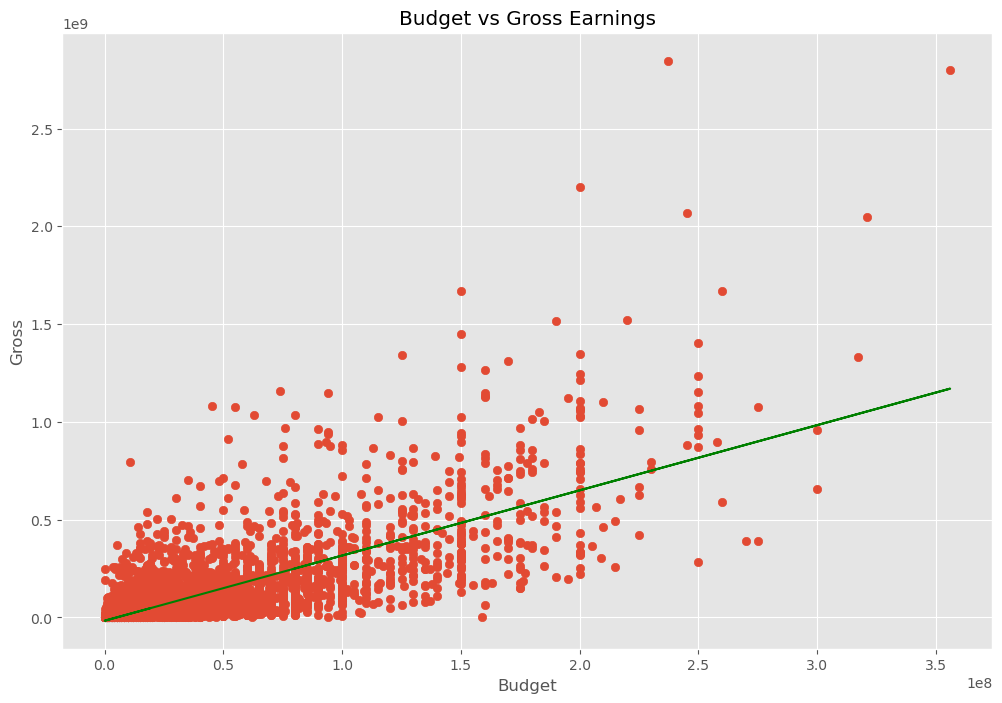

In [21]:
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title("Budget vs Gross Earnings")
m, b = np.polyfit(df['budget'], df['gross'], 1)
plt.plot(df['budget'], m*df['budget'] + b, color='green')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

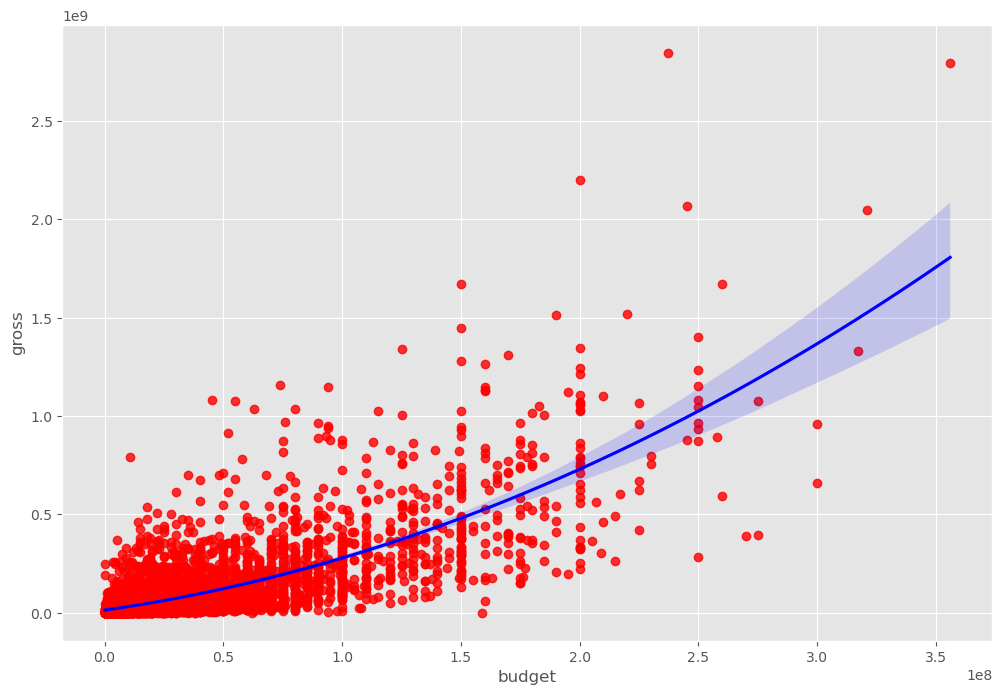

In [23]:
sns.regplot(x='budget', y = 'gross', data = df, order = 2, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})


In [25]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
print(corr_matrix)

                 year     score     votes    budget     gross   runtime  \
year         1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score        0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes        0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget       0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross        0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime      0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
yearcorrect  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

             yearcorrect  
year            0.998641  
score           0.061029  
votes           0.202883  
budget          0.320245  
gross           0.268626  
runtime         0.074432  
yearcorrect     1.000000  


<Axes: xlabel='score', ylabel='gross'>

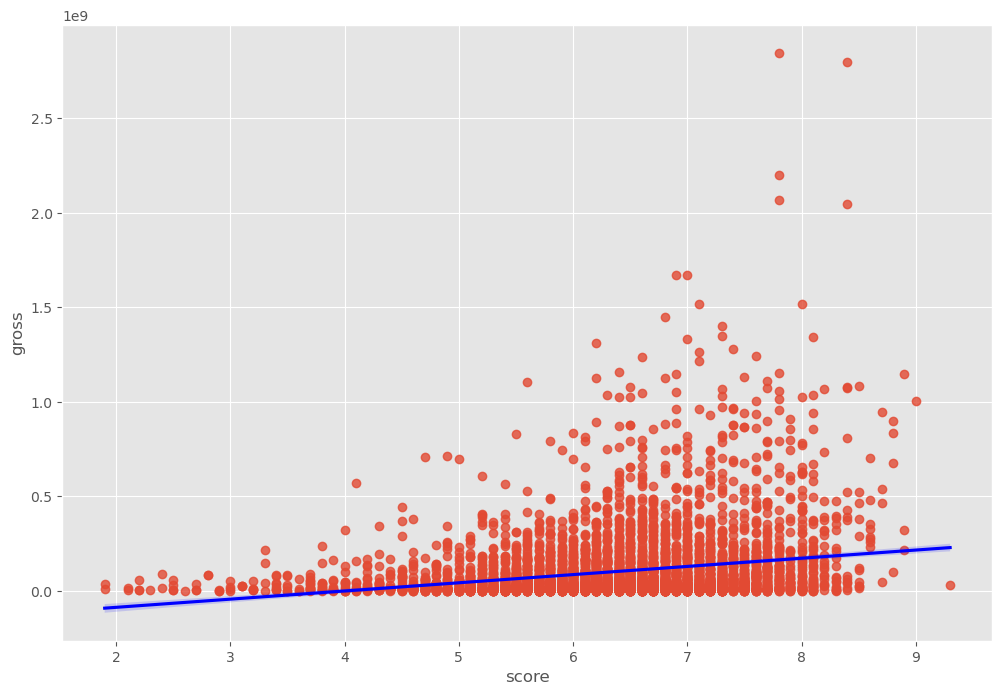

In [75]:
sns.regplot(x='score', y = 'gross', data = df, line_kws = {"color": "blue"})

In [27]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
print(corr_matrix)


                 year     score     votes    budget     gross   runtime  \
year         1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score        0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes        0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget       0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross        0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime      0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
yearcorrect  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

             yearcorrect  
year            0.998641  
score           0.061029  
votes           0.202883  
budget          0.320245  
gross           0.268626  
runtime         0.074432  
yearcorrect     1.000000  


In [29]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.drop(columns=['yearcorrect'])
types = ['spearman', 'pearson', 'kendall']

for methods in types:
    print(methods + " correlation" )
    print(numeric_df.corr(method= methods))
    print ("\n")


spearman correlation
             year     score     votes    budget     gross   runtime
year     1.000000  0.056269  0.426571  0.313199  0.350679  0.094396
score    0.056269  1.000000  0.495379 -0.010133  0.182857  0.413040
votes    0.426571  0.495379  1.000000  0.493404  0.745815  0.300959
budget   0.313199 -0.010133  0.493404  1.000000  0.693670  0.330276
gross    0.350679  0.182857  0.745815  0.693670  1.000000  0.257121
runtime  0.094396  0.413040  0.300959  0.330276  0.257121  1.000000


pearson correlation
             year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000


ken

<Axes: xlabel='votes', ylabel='gross'>

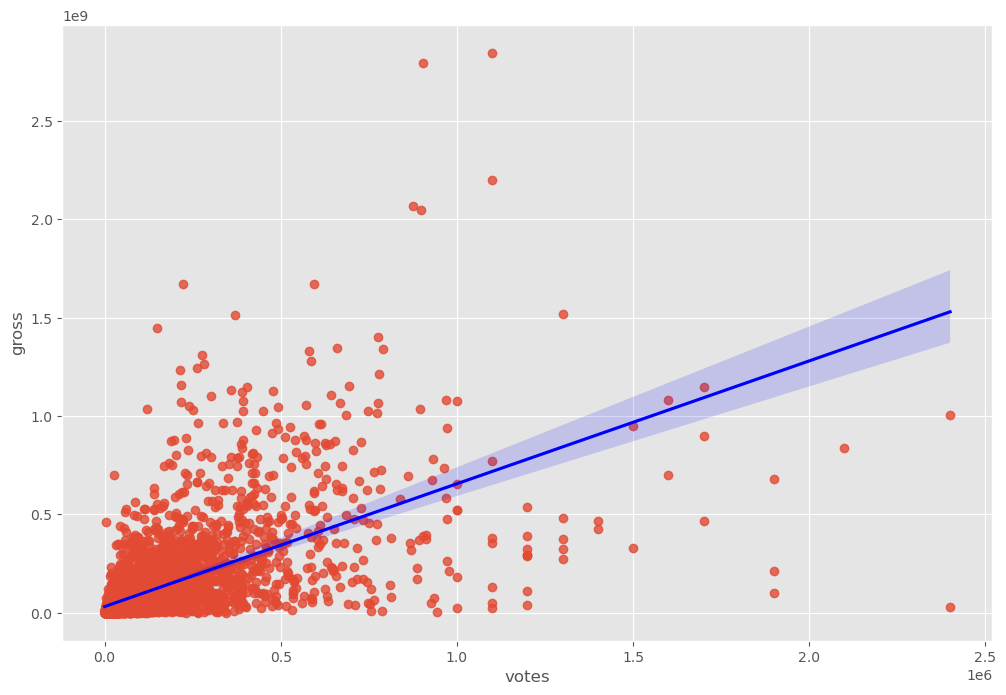

In [31]:
sns.regplot(x = "votes", y = "gross", data = df,line_kws = {"color": "blue"})

Text(120.72222222222221, 0.5, 'Movie Features')

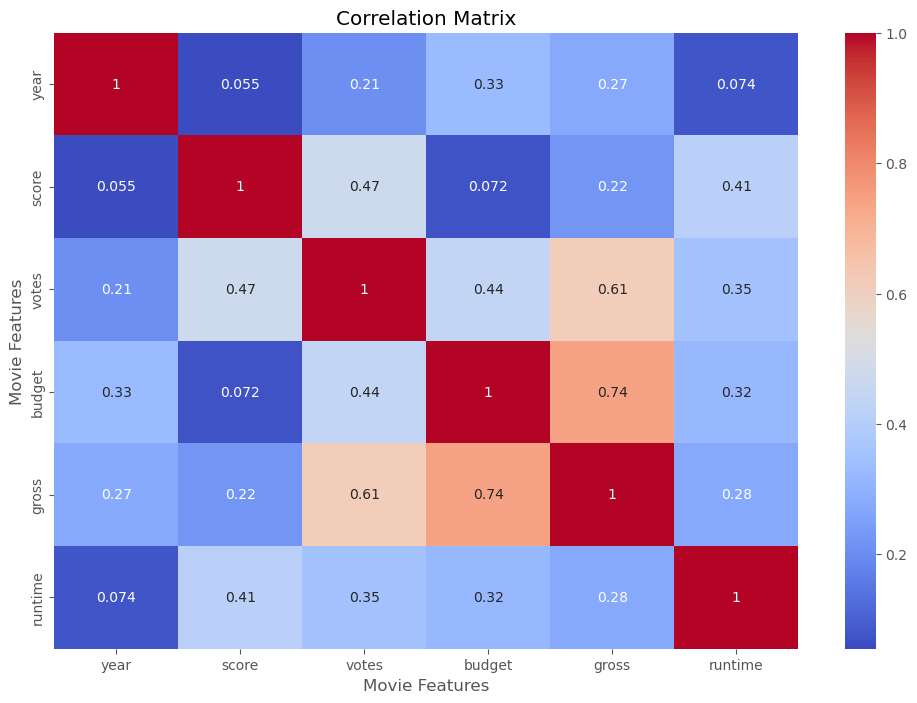

In [33]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.drop(columns=['yearcorrect'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [35]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,1980
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,1980
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,1980
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,1980
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0,2020
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0,2020
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0,2020
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0,2020


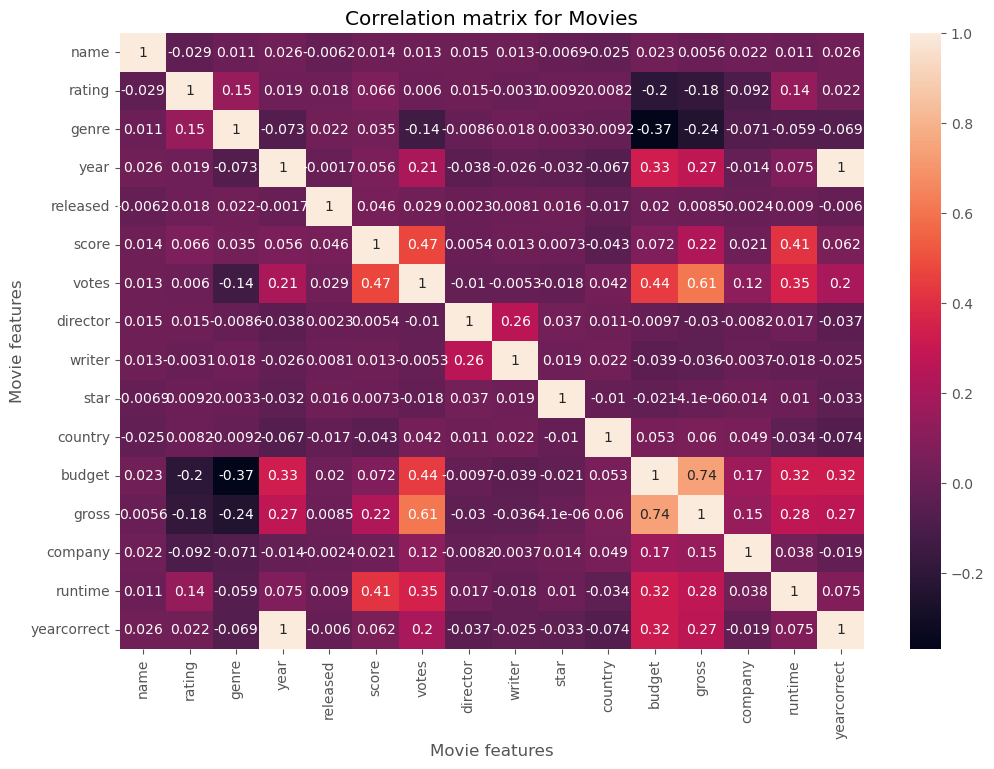

In [145]:
numeric_df = numeric_df.drop(columns=['name'])
numeric_df = numeric_df.drop(columns=['year'])
numeric_df = numeric_df.drop(columns=['released'])
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [37]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.024734
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.023634
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.068848
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203,0.998641
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619,-0.005625
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.061029
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.202883
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.036281
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.024397
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.033168


In [39]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs
sorted_pairs = corr_pairs.sort_values()
print (sorted_pairs)

budget       genre         -0.368900
genre        budget        -0.368900
             gross         -0.244380
gross        genre         -0.244380
rating       budget        -0.186892
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [60]:
import math
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
print("High Correlation")
print(high_corr)
medium_corr = sorted_pairs[(abs(sorted_pairs) > 0.3) & abs(sorted_pairs <= 0.5)]
print("Medium Correlation")
print(medium_corr)
low_corr = sorted_pairs[(abs(sorted_pairs) > 0.0) & abs(sorted_pairs) <= 0.3]
print("Low Correlation")
print(low_corr)

High Correlation
gross        votes          0.614904
votes        gross          0.614904
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.998641
yearcorrect  year           0.998641
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64
Medium Correlation
budget       genre         -0.368900
genre        budget        -0.368900
budget       runtime        0.318595
runtime      budget     